In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Loading the Dataset
wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# 2. Spliting the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Baseline Model (No PCA)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Baseline Model (No PCA) - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Baseline Model (No PCA) - Accuracy: 0.9814814814814815, Precision: 0.9824561403508772, Recall: 0.9814814814814815


In [9]:
# 4. Applying PCA with different numbers of components
components_list = [2, 5, 10]
pca_models = {}
X_train_pca = {}
X_test_pca = {}

for n_components in components_list:
    pca = PCA(n_components=n_components)
    X_train_pca[n_components] = pca.fit_transform(X_train_scaled)
    X_test_pca[n_components] = pca.transform(X_test_scaled)
    pca_models[n_components] = pca

In [10]:
# 5. Train and evaluate the model for each PCA-reduced dataset
results = {}

for n_components in components_list:
    model_pca = LogisticRegression(max_iter=10000)
    model_pca.fit(X_train_pca[n_components], y_train)

    y_pred_pca = model_pca.predict(X_test_pca[n_components])
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    results[n_components] = {
        'accuracy': accuracy_pca,
        'precision': precision_pca,
        'recall': recall_pca
    }

for n_components, metrics in results.items():
    print(f"Model with {n_components} PCA Components - Accuracy: {metrics['accuracy']}, Precision: {metrics['precision']}, Recall: {metrics['recall']}")


Model with 2 PCA Components - Accuracy: 0.9444444444444444, Precision: 0.9450386215092097, Recall: 0.9444444444444444
Model with 5 PCA Components - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Model with 10 PCA Components - Accuracy: 0.9814814814814815, Precision: 0.9824561403508772, Recall: 0.9814814814814815


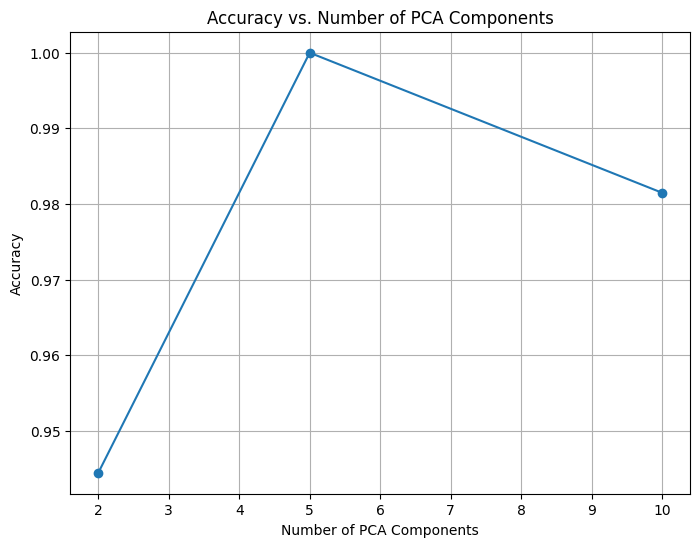

In [11]:
# 6. Visualization
components = list(results.keys())
accuracies = [results[n]['accuracy'] for n in components]

plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
